In [ ]:
# Before running these commands, create a virtual environment (outside project directory) using python -m venv "dir_name/env_name"
%pip install deepxde
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install chart-studio
%pip install nbformat



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import tensorflow as tf

geo = dde.geometry.geometry_3d.Sphere([0, 0, 0], 1)
sphere1 = dde.geometry.geometry_3d.Sphere([0, 0, 0], 0.5)
geo = dde.geometry.CSGDifference(geo, sphere1)

T = 0.01

def committor(x, q):
    dlap_q = sum(dde.gradients.hessian(q, x, i=num, j=num) for num in range(3))
    beta = 1 / T  
    return -1 / beta * dlap_q

bc_a = dde.icbc.DirichletBC(geo, lambda x: 0.0, lambda x, on_boundary: on_boundary and np.isclose(np.linalg.norm(x), 0.5))
bc_b = dde.icbc.DirichletBC(geo, lambda x: 1.0, lambda x, on_boundary: on_boundary and np.isclose(np.linalg.norm(x), 1))

In [4]:
import warnings 
warnings.filterwarnings("ignore")

data = dde.data.pde.PDE(
    geo,
    committor, 
    [bc_a, bc_b], 
    num_domain=2000,
    num_boundary=500,
    num_test=500,
)

In [5]:
net = dde.maps.FNN([3] + [64] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=4000)

Compiling model...
Building feed-forward neural network...
'build' took 0.067864 s


'compile' took 0.731904 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.05e-07, 2.35e-03, 1.00e+00]    [4.86e-07, 2.35e-03, 1.00e+00]    []  
1000      [3.45e-03, 2.03e-04, 1.62e-04]    [3.25e-03, 2.03e-04, 1.62e-04]    []  
2000      [2.95e-03, 5.48e-05, 1.21e-04]    [2.63e-03, 5.48e-05, 1.21e-04]    []  
3000      [2.33e-03, 7.26e-05, 1.63e-04]    [1.87e-03, 7.26e-05, 1.63e-04]    []  
4000      [1.83e-03, 4.54e-05, 1.03e-04]    [1.27e-03, 4.54e-05, 1.03e-04]    []  

Best model at step 4000:
  train loss: 1.98e-03
  test loss: 1.42e-03
  test metric: []

'train' took 146.808110 s



In [6]:
model.compile("L-BFGS-B")
losshistory, train_state=model.train()

Compiling model...
'compile' took 0.516027 s

Training model...

Step      Train loss                        Test loss                         Test metric
4000      [1.83e-03, 4.54e-05, 1.03e-04]    [1.27e-03, 4.54e-05, 1.03e-04]    []  

INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  Objective function value: 0.001978
  Number of iterations: 1
  Number of functions evaluations: 31
4017      [1.83e-03, 4.54e-05, 1.03e-04]    [1.27e-03, 4.54e-05, 1.03e-04]    []  

Best model at step 4000:
  train loss: 1.98e-03
  test loss: 1.42e-03
  test metric: []

'train' took 1.569236 s



[ 0.9891248   0.9768483   0.9642436   0.9513078   0.93803734  0.92443097
  0.9104863   0.89620095  0.88157284  0.8665995   0.85128087  0.83561516
  0.81960005  0.8032364   0.78652316  0.7694607   0.75204724  0.7342851
  0.7161746   0.69771665  0.6789125   0.6597651   0.640276    0.6204483
  0.6002844   0.5797886   0.5589658   0.5378206   0.5163559   0.4945799
  0.47249734  0.45011628  0.42744368  0.40448737  0.38125634  0.35776
  0.33400697  0.31000936  0.28577793  0.26132393  0.23666053  0.2118005
  0.18675862  0.1615489   0.13618575  0.1106867   0.08506821  0.05934702
  0.03354083  0.00766854 -0.00327612  0.02156605  0.04630582  0.07093053
  0.09542729  0.11978479  0.14399146  0.1680382   0.1919166   0.21561699
  0.23913254  0.2624573   0.2855845   0.3085094   0.33122677  0.35373366
  0.37602478  0.39809936  0.41995275  0.4415846   0.46299225  0.4841748
  0.5051316   0.5258621   0.546366    0.5666426   0.5866929   0.60651785
  0.62611747  0.6454931   0.664646    0.6835774   0.7022878

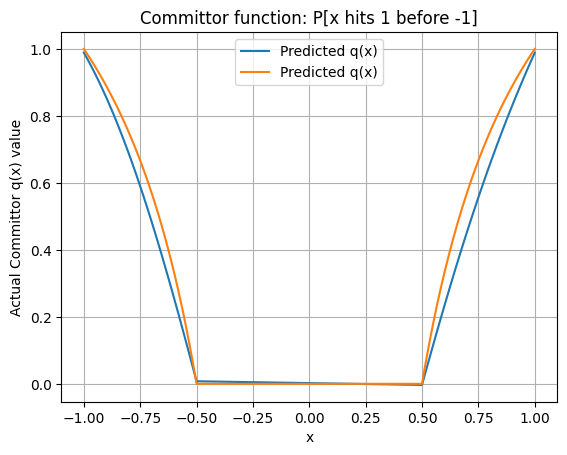

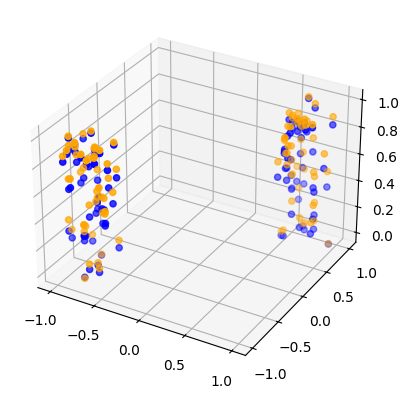

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sample = np.append(np.linspace(-1, -0.5, 50), np.linspace(0.5, 1, 50)).reshape(-1, 1)

for i in range(1, 3):
    sample = np.concat([sample, np.linspace(0, 0, 100).reshape(-1, 1)], axis=1)

u_pred = model.predict(sample).flatten()
print(u_pred)
u_actual = (np.linalg.norm(sample, axis=1)**(-1) - 0.5**(-1))/(1 - 0.5**(-1))

plt.plot(sample[:, 0], u_pred, label="Predicted q(x)")
plt.plot(sample[:, 0], u_actual, label="Predicted q(x)")
plt.xlabel("x")
plt.ylabel("Actual Committor q(x) value")
plt.title("Committor function: P[x hits 1 before -1]")
plt.grid(True)
plt.legend()
plt.show()

sample[:,0] = np.append(np.random.rand(50)*-0.5 - 0.5, np.random.rand(50)*0.5 + 0.5)
sample[:,1] = np.append(np.random.rand(50)*-0.5 - 0.5, np.random.rand(50)*0.5 + 0.5)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample[:,0], sample[:,1], u_actual, c='orange')
ax.scatter(sample[:,0], sample[:,1], u_pred, c='blue')